# A Tutorial on Analyzing Geospatial Data for Environmental Health Outcomes: Air Quality Use Case
### by Lily Cook, CS 627
***

![Image](https://www.cdc.gov/gis/images/geo-spatial-data.jpg)

### Why is analyzing geospatial data important?
* We know there is a relationship between our environment and our health. It is estimated that our environment contributes about 10% to our health outcomes - about the same as smoking. Of this, air quality accounts for about half - about 5%, which is the same amount that adult obesity contributes to health outcomes. 
* Environmental contaminants such as air pollution are highly location-specific.
* In order to determine exposure to environmental contaminants we need to:
    * know where patients been,  
    * know where the contaminants are, and
    * find ways to link both kinds of data for analysis.\
One way is to use zip codes - we can check if there is a match between the places we know patients have been (such as their home address) and the zip codes of the places known to contain contaminants.
* As researchers, we rarely consider how our data is distributed spatially or geographically. Not only is it important to think about, it can make visualizations of your data much more interesting.

**The bottom line: Analyzing geospatial data can help us better understand who has been exposed to contaminants such as air pollution.**

### Project Goals:
**1. Identify and become familiar with Python packages specific to geospatial data.**\
**2. Understand how analyzing geospatial data differs from analyzing other types of data. Learn how to manipulate and visualize geospatial data in Python given these differences.**\
**3. Learn how to model geospatial data.**\
**4. Teach others how to work with geospatial data. Give them the tools to visualize their datasets on a map.**

***

## Goal 1: Packages for Geospatial Data in Python

I tested out dozens of packages, and the ones in this notebook are those that I found most reliable, efficient, and easiest to use.\
Primarily I have relied on `geopandas`, with some mapping help from `matplotlib` and `folium`. Geopandas has many dependencies, including `fiona`, `shapely` (which we've used in this course), and `gdal`. I recommend using `conda-forge` to install Geopandas because many users have reported problems due to conflicts. Another important thing to remember when using pandas is to be clear about whether you are working with a ***view*** of a file and when you are working with a ***copy***. This distinction can be particularly confusing in pandas and I spent a lot of time backtracking and sorting out which was which after getting unexpected errors.

#### Packages for Machine Learning with Geospatial Data

I was able to find some packages for conducting machine learning with geospatial data, but most were only available for use in programming languages other than Python:
* R: There are several for R, including `spdep`, `spData`, and `mapview`.
* SQL: `Spatialite`
* Java: `Weka`

For Python users, the two options I found were:
1) `PySal`, the Python Spatial Analysis library, offers spatial regression analysis. However, I found the documentation to be poorly written, which made it difficult to implement without the guidance of a more experienced user.\
2) It is possible to add machine learning capability to **ArcGIS**, the most commonly used GIS program/software. However, ArcGIS only runs on Windows, it is pricey, and it needs a large, fast server. I have a Mac and can run ArcGIS through a virtual machine (VM), but OHSU requires that I use their servers and their software if I use ArcGIS to conduct research (which I do). This means I have little storage space and the program runs very, very slowly. Also, IT insisted on installing the VM, which meant I had to surrender my laptop for "a couple of hours," which turned into two weeks. ArcGIS runs so infuriatingly slowly on the OHSU-approved VM that I actually set up my own server using AWS, but IT did not approve of this solution. 

#### General Resources
The most helpful resource I drew from for this project is [Automating GIS Processes](https://automating-gis-processes.github.io/site/index.html#). This Python tutorial was written by Henrikki Tenkanen and Vuokko Heikinheimo from the Digital Geography Lab at the University of Helsinki, Finland. \
I also recommend [Awesome Geospatial](https://github.com/sacridini/Awesome-Geospatial), a comprehensive list of geospatial analysis tools.

## Goal 2: How is analyzing spatial data different? Given these differences, how do we manipulate it? 

I discovered that analyzing spatial data is different in the following ways:
* different file and data types
* Projections

### Geospatial file types

As a result of this project I learned that there are three **required** file types when working with geospatial data:
* `.shp` - The shapefile is the main file, and it stores information about the geographic *feature* you are working with (i.e, the vector and geometric describing it).
* `.shx` - The index file stores the index of the feature geometry.
* `.dbf` - The database table that stores attributes of the features.

All three must all be together in the same directory with the same filename. For example, "Portland.shp" would have to be stored alongside "Portland.shx" and "Portland.dbf".\
There are many more optional file types such as `.prj`, `.sbn`, `.sbx`, etc.

### Geospatial data types

Let's use Geopandas to take a look at a dataset of spatial data containing all of Oregon's zip codes:

In [252]:
import geopandas as gpd
fp = "Oregon_Zip_Codes.shp"
OR_zips = gpd.read_file(fp) ## although you need all 3 file types in the directory, you only need to read in the shapefile, .shp
type(OR_zips) ## identify the data type contained in this file

geopandas.geodataframe.GeoDataFrame

Note that the data type is a geodataframe. How is that different from a regular dataframe? We'll take a quick peek at the data to find out:

In [253]:
OR_zips.head()

,OBJECTID,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape_Leng,Shape_Area,geometry
0,60,00068,Siuslaw Ntl Forest,OR,-99,-99.00,13.02,0.302413,0.003800,"POLYGON ((-123.89331 44.23264, -123.89335 44.2..."
1,61,00069,Willamette National for,OR,-99,-99.00,1035.34,6.185862,0.299922,"MULTIPOLYGON (((-122.44209 43.68800, -122.4420..."
2,68,00077,Willamette Natl Forest,OR,-99,-99.00,172.30,1.518172,0.050589,"POLYGON ((-122.06666 44.65487, -122.06240 44.6..."
3,29767,97002,Aurora,OR,6273,145.24,43.19,0.941328,0.012820,"POLYGON ((-122.71795 45.29982, -122.71914 45.2..."
4,29768,97003,Beaverton,OR,28877,6028.60,4.79,0.187725,0.001427,"POLYGON ((-122.82671 45.50392, -122.82700 45.5..."


There's a column labelled `geometry`! That's different.
It means that we can visualize at the data as a map rather than as a collection of points on a graph. Let's try that using `matplotlib`.

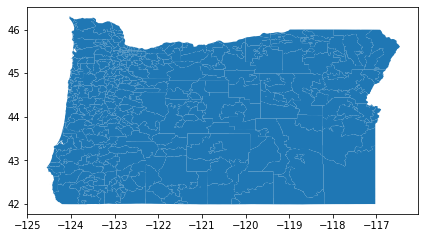

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
OR_zips.plot() # make the map
plt.tight_layout() #remove white space

Also, the information in the `geometry` column is preceeded by some information about its shape. Instead of the usual x, y coordinates we think about when graphing an array or dataframe, the data in a geodataframe can be more than a single point. After all, zip codes, cities, counties, and countries are NOT points (although they can be simplified to a centroid, or point, if necessary).
Flavors of `geometry` in geodataframes include:
* Centroids, aka points.
* Polygons
* Multipolygons

Not sure what a multipolygon is? Fortunately, Shapely (a dependency in Geopandas) can tell us all about what these mean if necessary:

In [185]:
from shapely.geometry import Point, Polygon, MultiPolygon
#help(MultiPolygon) #uncomment if you want to view the definition; I felt it was too long!

### A Brief Interlude Into Projections

The UN logo shows a map of the world using the Azimuthal equidistant projection.

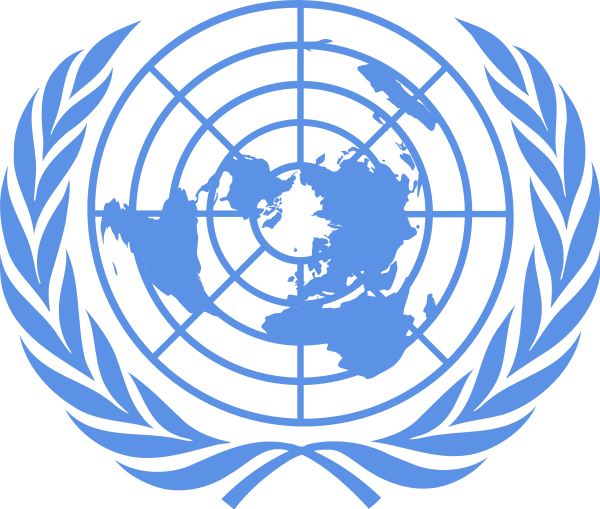

Projections are a very essential part of working with geospatial data. But what the hell are projections, anyway?\
Well, this may come as a huge surprise to you, but: **The earth is round!**  
 ...and computer screens are not.\
In other words:
* Geospatial data is spherical and 3-dimensional, BUT
* We have to work with it in 2-dimensions.

To deal with this, may I introduce you to **projections!** Projections are ways of translating the 3-D shape of the earth onto a 2-D screen or map. There are many different flavors - Cartesian, Mercator – dozens to choose from.

Projections need a *coordinate reference system* (crs), which use *datum* to relate the 2-D map to real places on the earth. When programming with geospatial data, it is essential to choose/assign the right coordinate reference system.
EPSG encodes these reference systems to use for programming and other applications, so these codes are always preceded with `epsg:`. 

So what coordinate reference system (crs) are we using here with our zip code data? Geopandas will tell us! Let's check.

In [254]:
print(OR_zips.crs)

{'init': 'epsg:4326'}


I learned that 4326 is the code for the most commonly used coordinate reference system, **WGS84**, or the World Geodetic System 1984. You probably know WGS84 better as Latitude and Longitude. WGS84 is far from ubiquitous, however - it is *not* safe to assume that all geospatial datasets use the WGS84 coordinate reference system.\
What if we want to look at our map a different way, using a different coordinate reference system? We'll try the Mercator projection and see how that looks different. Note that the EPSG code for the Mercator projection is 3395. 

In [6]:
OR_zips_Mercator = OR_zips.copy() # copy the original file
OR_zips_Mercator = OR_zips_Mercator.to_crs({'init': 'epsg:3395'}) # Project onto a new map

Then we'll put the new map alongside the first one to see how they differ:

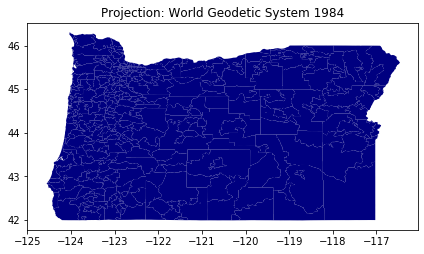

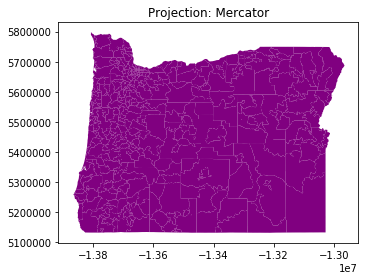

In [7]:
OR_zips.plot(facecolor='navy') #we'll make them different colors for clarity
plt.title("Projection: World Geodetic System 1984") #...and add a label to remember which is which
plt.tight_layout()

OR_zips_Mercator.plot(facecolor='purple') # Plot the one with Mercator projection
plt.title("Projection: Mercator") #label
plt.tight_layout();

If we want to map the locations of all of Oregon's air quality monitors (and who doesn't, really), then what we'd need about now is their locations. Luckily for you, I have already made this table! (with acknowledgements to the EPA and the Oregon DEQ for the raw data). We'll read in the data and map it.

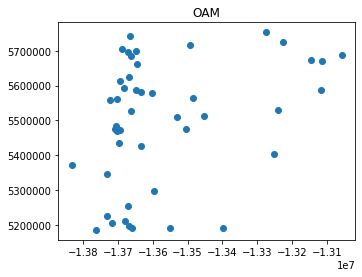

In [255]:
OAM = "Oregon_AirMonitors.shp"
OAM = gpd.read_file(OAM)
OAM.drop_duplicates(subset = 'SiteName', inplace=True) ## remove the duplicate values
OAM.plot()
plt.title("OAM");

Hmmm. The numbers labelling the x and y axes don't look quite right here... they look like the Mercator projection numbers, not the WGS84 we were planning on using. Let's check to make sure that the zip code geodataset and the air quality monitor geodataset are using the same coordinate reference system:

In [256]:
OAM.crs == OR_zips.crs

False

Dang. They are NOT using the same reference system. The moral of this story is that we really can't make assumptions about the coordinate reference system of a dataset. If we don't fix this, then we can't plot these air quality monitor locations as points on our zip code map. Fortunately, we can reuse the code we used earlier to look at the Mercator map of Oregon, but this time we'll apply the transformation to points (individual air quality monitor locations) rather than polygons (zip code chunks):

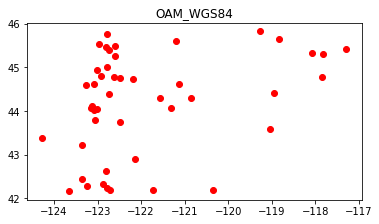

In [257]:
OAM_WGS84 = OAM.copy() #copy the file
OAM_WGS84 = OAM_WGS84.to_crs({'init': 'epsg:4326'}) # Project onto a new map
OAM_WGS84.plot(facecolor='red') #use a different color to distinguish it from the one above
plt.title("OAM_WGS84"); #add label

That's better! Now that we've got them on the same projection, let's put both layers together onto one map:

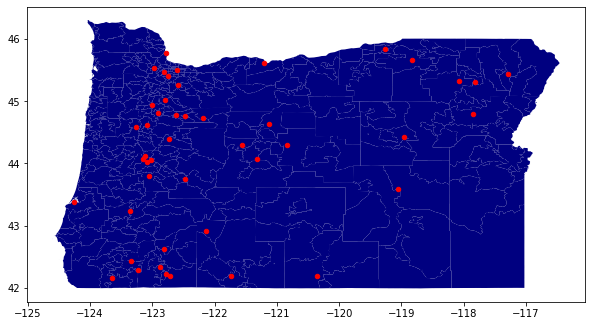

In [258]:
fig, ax = plt.subplots(figsize=(10,10))
OR_zips.plot(ax=ax, color='navy')
OAM_WGS84.plot(ax=ax, color='red', markersize=20);

Beautiful! But here's what it would have looked like if we hadn't first made sure they were using the same projection: 

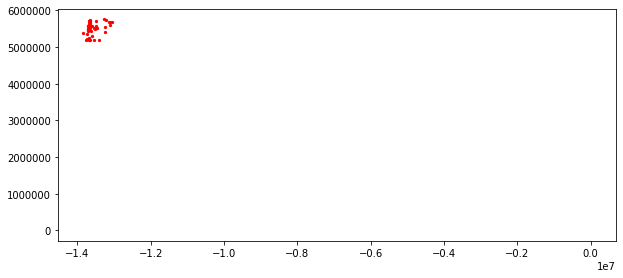

In [191]:
fig, ax = plt.subplots(figsize=(10,10))
OR_zips.plot(ax=ax, color='navy')
OAM.plot(ax=ax, color='red', markersize=5);

... which doesn't really look like anything discernible at all. 

If we want to make our map of air quality monitor locations all fancy and interactive we can use Leaflet. I found a wrapper for Leaflet called `folium` that can be used to easily create interactive maps. I used it to make a simple map of the state of Oregon, and add customizable markers indicating the locations of all the air quality monitors in the state. Note how much more sophisticated this map looks than the earlier matplotlib ones. This map zooms and displays two kinds of markers: the clickable, labelled marker in green tells us where we are, and the blue markers show the air monitor locations.

In [259]:
# Keep in mind that the lat and long of the center of the state of Oregon are 43.8041° N, 120.5542° W, and that Western longitudes need to be negative
import folium
# create the map of Oregon; you can change the zoom depending on how far out you want the map to start  
m = folium.Map(location=[43.80, -120.55], min_zoom = 5, max_zoom = 8, zoom_start=7, control_scale=True) 
monitor_map = OAM_WGS84.copy() #copy the file to prevent the file types from getting messy and unusable
monitormap_gjson = folium.features.GeoJson(monitor_map, name="Air Monitors") # Convert air quality monitor data to GeoJSON
monitormap_gjson.add_to(m) # add monitors to the map we created
# create a clickable, labelled marker of a different color and icon from the air quality monitors.
folium.Marker(location=[43.80, -120.55], popup='State of Oregon', icon=folium.Icon(color='green', icon='home')).add_to(m)
m # profit!

We can also make the map less cluttered and easier to read by consolidating the markers that are clustered closely together. For some reason `folium` requires data to be in an array when using this and all its plugins, so we have to remember to put the geodataframe into a list: 

In [260]:
from folium.plugins import MarkerCluster
m = folium.Map(location=[43.80, -120.55], zoom_start=7) 
# create geometry of the centroids on the map (i.e., the air monitor locations)
monitor_map["x"] = monitor_map["geometry"].apply(lambda geom: geom.x)
monitor_map["y"] = monitor_map["geometry"].apply(lambda geom: geom.y)
air_monitors = list(zip(monitor_map["y"], monitor_map["x"])) # create the list of air quality monitor locations
marker_cluster = MarkerCluster(air_monitors) # creates markers and clusters them together
marker_cluster.add_to(m) # add 'em to the map
m # profit!

In [194]:
## uncomment to save that beautiful map we just made
outfp = "MonitorCluster_map.html" 
m.save(outfp)

Now you can click on the numbered cluster to zoom in and see all the markers in that particular cluster, and hover over them to see the geometry created by the collection of the marker points.\
If you click on the cluster near Eugene it will scuttle you through several layers of clustered points. Wheeee!

## Goal 3: Modelling geospatial data

Say you are a researcher who wants to know whether patients have been exposed to air pollution. The easiest way to do this is to figure out which air quality monitor each patient lives closest to, and then use the measurement from the air quality monitor to determine how much pollution they were exposed to. There's a complication, though: if you look at the map of the air quality monitors we made above, you'll notice that the monitors are not evenly spread throughout the state. What about patients who live far away from the nearest monitor? How do we figure out their exposure?

One way to approach the problem would be to figure out which parts of the state don't have an air quality monitor. We could do this by identifying which zip codes in Oregon don't contain an air quality monitor and running these through a nearest neighbors algorithm.

The first step is to join the two tables we've been using above, the zip code and air monitor tables. Then we'll clean up the new table, add a column to hold the information about whether or not a table has a monitor, and rename it.

In [318]:
#import numpy as np
OR_zips = OR_zips.to_crs(OAM_WGS84.crs) # make sure both datasets are using the same coordinate reference system
OR_AQmonitors = OAM_WGS84.copy()
selected_cols = ['SiteName', 'geometry'] #select just the columns we need from the Air Monitor dataset
OR_AQmonitors = OR_AQmonitors[selected_cols]
OR_AQmonitors.head()

,SiteName,geometry
0,The Dalles - Cherry Heights,POINT (-121.20339 45.60242)
1,Grants Pass - Parkside School,POINT (-123.34847 42.43415)
2,Cottage Grove City Shops,POINT (-123.05350 43.79950)
3,Medford Welch & Jackson,POINT (-122.88027 42.33155)
4,Enterprise - US Forest Service,POINT (-117.29607 45.42635)


In [319]:
OR_AQmonitors = OR_AQmonitors.rename(columns={'geometry':'monitor_loc'}) 

In [321]:
OR_AQmonitors.head()

,SiteName,monitor_loc
0,The Dalles - Cherry Heights,POINT (-121.20339 45.60242)
1,Grants Pass - Parkside School,POINT (-123.34847 42.43415)
2,Cottage Grove City Shops,POINT (-123.05350 43.79950)
3,Medford Welch & Jackson,POINT (-122.88027 42.33155)
4,Enterprise - US Forest Service,POINT (-117.29607 45.42635)


In [322]:
join = gpd.sjoin(OR_zips, OR_AQmonitors, how="left", op="intersects") # join tables to tell us if each zip contains an air monitor while keep zip code data
join.head()

AttributeError: No geometry data set yet (expected in column 'geometry'.

In [307]:
join = join.rename(columns={'index_right':'AirMonitor', 'SiteName':'MonitorSite'}) # rename columns to be more comprehensible
selected_cols = ['ZIP_CODE', 'PO_NAME', 'STATE', 'POP_SQMI', 'SQMI', 'Shape_Leng', 'Shape_Area','geometry', 'SiteName'] #selects only the columns we need from the Air Monitor dataset
MonitorZips_join = join[selected_cols] #rename the joined table
MonitorZips_join.head()

,ZIP_CODE,PO_NAME,STATE,POP_SQMI,SQMI,Shape_Leng,Shape_Area,geometry,SiteName
0,00068,Siuslaw Ntl Forest,OR,-99.00,13.02,0.302413,0.003800,"POLYGON ((-123.89331 44.23264, -123.89335 44.2...",NaN
1,00069,Willamette National for,OR,-99.00,1035.34,6.185862,0.299922,"MULTIPOLYGON (((-122.44209 43.68800, -122.4420...",NaN
2,00077,Willamette Natl Forest,OR,-99.00,172.30,1.518172,0.050589,"POLYGON ((-122.06666 44.65487, -122.06240 44.6...",NaN
3,97002,Aurora,OR,145.24,43.19,0.941328,0.012820,"POLYGON ((-122.71795 45.29982, -122.71914 45.2...",NaN
4,97003,Beaverton,OR,6028.60,4.79,0.187725,0.001427,"POLYGON ((-122.82671 45.50392, -122.82700 45.5...",NaN


In [308]:
# join this table to the one with the zip code centroids...
ORzipsMiddle = gpd.read_file('ORzipsCentroids.shp')
selected_cols = ['ZIP_CODE', 'geometry'] #select just the columns we need from the Air Monitor dataset
ORzipsMiddle = ORzipsMiddle[selected_cols]

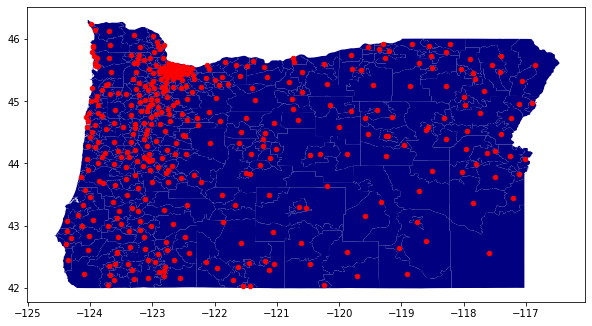

In [309]:
# codes the map so you can add additional points, etc.
fig, ax = plt.subplots(figsize=(10,10))
MonitorZips_join.plot(ax=ax, color='navy')
ORzipsMiddle.plot(ax=ax, color='red', markersize=20);

In [310]:
#ORzipsCenters = ORzipsMiddle.rename(columns={'geometry':'zip_centroid'}) #may need to designate geometry here? 
ORzipsCenters.head()
#first, drop everything except zip code and geometry
# then rename the geometry here so they don't overlap

,ZIP_CODE,zip_centroid
0,00068,POINT (-123.91749 44.25722)
1,00069,POINT (-122.32221 43.80434)
2,00077,POINT (-122.26356 44.60767)
3,97002,POINT (-122.79908 45.23793)
4,97003,POINT (-122.86572 45.50311)


In [316]:
#MonitorsNzips = ORzipsMiddle.join(MonitorZips_join)
#MonitorsNzips = gpd.sjoin(OR_zips, ORzipsMiddle, how="left", op="intersects") 
MonitorsWithZips = MonitorZips_join.merge(ORzipsCenters, on='ZIP_CODE')
MonitorsWithZips.head()

#the code below throws errors for unknown reasons
#MonitorsWithZips.to_file("MonitorsWithZips.shp")

,ZIP_CODE,PO_NAME,STATE,POP_SQMI,SQMI,Shape_Leng,Shape_Area,geometry,SiteName,zip_centroid
0,00068,Siuslaw Ntl Forest,OR,-99.00,13.02,0.302413,0.003800,"POLYGON ((-123.89331 44.23264, -123.89335 44.2...",NaN,POINT (-123.91749 44.25722)
1,00069,Willamette National for,OR,-99.00,1035.34,6.185862,0.299922,"MULTIPOLYGON (((-122.44209 43.68800, -122.4420...",NaN,POINT (-122.32221 43.80434)
2,00077,Willamette Natl Forest,OR,-99.00,172.30,1.518172,0.050589,"POLYGON ((-122.06666 44.65487, -122.06240 44.6...",NaN,POINT (-122.26356 44.60767)
3,97002,Aurora,OR,145.24,43.19,0.941328,0.012820,"POLYGON ((-122.71795 45.29982, -122.71914 45.2...",NaN,POINT (-122.79908 45.23793)
4,97003,Beaverton,OR,6028.60,4.79,0.187725,0.001427,"POLYGON ((-122.82671 45.50392, -122.82700 45.5...",NaN,POINT (-122.86572 45.50311)


In [ ]:
## the code below encodes the SiteName column, but I think there muse be a better way to do it because this transformation makes the data weird.
## It transforms into a numpy array which then makes everything weird. Maybe make a copy 

# create a new column, AirMonitor_new, where 0 means a zip code has no monitor and 1 means it does have a monitor. It will be encoded based on whether or not there's a value in the MonitorSite Column
#MonitorZips_join.loc[:, ('AirMonitor_new')] = np.where(MonitorZips_join['SiteName'].str.contains('NaN'), 0, 1)

You may notice that there are quite a few zip codes without an air monitor!

Next we have to find the closest air monitor for the zip codes. This part is considerably more complicated and is where we'll use modelling.\
The code below identifies the closest air monitor for each zip code, then outputs the distance from the centroid for each zip code to the closest air quality monitor. I've used BallTree, an algorithm from scikit learn's k-nearest neighbors module, to cluster the zip code data. Prediction isn't necessary here because we only need to know which air monitors are closest to the zip codes; there is nothing we need to predict.  

In [198]:
from sklearn.neighbors import BallTree
import numpy as np
import geopandas as gpd

## read in the shapefile of zips, find centroids, and clean up
OR_zips = "Oregon_Zip_Codes.shp"
OR_zips = gpd.read_file(OR_zips) # read in the shapefile of zip codes
OR_zips['centroid'] = OR_zips.centroid # identify centroids of zip codes to convert them to points
ORzipsCentroids = OR_zips.copy()
selected_cols = ['ZIP_CODE', 'PO_NAME', 'STATE', 'POP_SQMI', 'SQMI', 'Shape_Leng', 'Shape_Area', 'centroid'] #selects only the columns we need from the Air Monitor dataset
ORzipsCentroids = ORzipsCentroids[selected_cols]
ORzipsCentroids = ORzipsCentroids.rename(columns={'centroid': 'geometry'}).set_geometry('geometry') 

## read in the shapefile of air quality monitors and convert to the WGS84 crs
OR_AirMon = "Oregon_AirMonitors.shp"
OR_AirMon = gpd.read_file(OR_AirMon)
OR_AirMon.drop_duplicates(subset = 'SiteName', inplace=True) # remove the duplicate rows
OR_AirMonWGS84 = OR_AirMon.copy() #copy the file
OR_AirMonitors = OR_AirMonWGS84.to_crs({'init': 'epsg:4326'}) #convert to WGS84 crs

## note that the default distance metric is euclidean ('minkowski'), and that
## changing the leaf size doesn't change the output, it only alters the length of time it takes the code to run. 
# here 'source' are the zip codes and 'candidates' should be zips w/monitors.
def get_nearest(src_points, candidates, k_neighbors=3):
    """finds NN for source points from candidate points"""
    tree = BallTree(candidates, leaf_size=10) # create tree from the zips. 
    distances, indices = tree.query(src_points, k=k_neighbors) # query datasets to find closest points and distances

    # put distances and indices into arrays
    distances = distances.transpose() 
    indices = indices.transpose()

    # find closest indices and distances
    closest = indices[0]
    closest_dist = distances[0]
    return (closest, closest_dist)

def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """finds closest point in right_gdf for each point in left_gdf"""
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    right = right_gdf.copy().reset_index(drop=True) # Make sure that index in right gdf is formed of sequential numbers

    # find coordinates from points and put them into an array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    
    # Find the nearest points w/o mixing up the rows
    # closest = index for right_gdf corresponding to the closest point; dist = distance between NNs
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)
    closest_points = right.loc[closest] # points in right_gdf closest to points in left_gdf
    closest_points = closest_points.reset_index(drop=True) # make sure that the index corresponds the one in left_gdf

    # Incorporate distance
    if return_dist:
        earth_radius = 3958.8  # earth's radius in miles, Convert to miles from radians
        closest_points['distance'] = dist * earth_radius
    return closest_points

# Find closest AQ Monitor for each zip, along with the distance (note that distance is in miles)
closest_AQMonitor = nearest_neighbor(ORzipsCentroids, OR_AirMonitors, return_dist=True)
closest_AQMonitor.head() #profit!

closest_AQMonitor.to_file("closest_AQMonitor.shp")

In [205]:
#ORzipsCentroids.to_file("ORzipsCentroids.shp")

It worked! I played around with the code and found that changing the k had no effect on the results. I'm not sure if that's because I did something wrong, or if it's simply because the closest air monitor will always be, well, the closest, and therefore will remain the same distance away. I really hope it's the latter.

Finally, we'll use the nearest neighbor result to create a map showing how the the zip codes centroids cluster to their respective air monitors.

In [213]:
import fiona
## cleans the table and creates a join so we can map the data

closestMonitors = gpd.read_file('closest_AQMonitor.shp')

In [202]:
with fiona.open('closest_AQMonitor.shp') as f:
    input_schema = f.schema

input_schema
    
#closestMonitors = closestMonitors.copy()
# Rename the coordinates of the closest air monitors to be more intuitive

{'properties': OrderedDict([('AQSID', 'str:80'),
              ('DataSource', 'str:80'),
              ('PM25_Measu', 'int:18'),
              ('PM25_Unit', 'str:80'),
              ('SiteName', 'str:80'),
              ('Status', 'str:80'),
              ('ObjectId', 'int:18'),
              ('distance', 'float:24.15')]),
 'geometry': 'Point'}

In [221]:
ORzipcodes = gpd.read_file('ORzipsCentroids.shp')

#ORzipcodes.printSchema

#closestMonitors_new = closestMonitors.rename(columns={'geometry': 'closest_AQ_geom'}).set_geometry('closest_AQ_geom')

AttributeError: 'GeoDataFrame' object has no attribute 'printSchema'

In [206]:
#ORzipcodes = ORzipsCentroids.copy()
with fiona.open('ORzipsCentroids.shp') as f:
    next_schema = f.schema
    
next_schema

In [215]:
OR_infoTable = ORzipcodes.join(closestMonitors_new)

#OR_infoTable = OR_infoTable.drop(columns=['PM25_Measu', 'PM25_Unit', 'Status'])

In [217]:
#OR_infoTable.to_file("OR_infoTable.shp")

#print(OR_infoTable)
#type(OR_infoTable)


#len(OR_infoTable)
#OR_infoTable.head()

#OR_infoTable = gpd.GeoDataFrame(gdf = OR_infoTable, geometry = 'geometry')

OR_infoTable.to_file("OR_infoTable.shp")
# save the GeoDataFrame
#gdf.to_file(driver = 'ESRI Shapefile', filename= "result.shp")
# or directly
#gdf.to_file("result2.shp")

#OR_infoTable.to_file('newfile.shp') #, schema = input_schema)


#with fiona.open('/tmp/testoutput.shp') as f:
    #output_schema = f.schema

#output = 'OR_infoTable.shp'
#OR_infoTable.to_file(output)

TypeError: data type not understood

In [183]:
import fiona
newfile = gpd.read_file('dist_map.shp')
newfile.head()

DriverError: 'dist_map.shp' not recognized as a supported file format.

In [181]:
from shapely.geometry import LineString

## make the lines from the zips to the air monitors
OR_infoTable['line'] = OR_infoTable.apply(lambda row: LineString([row['geometry'], row['closest_AQ_geom']]), axis=1)
line_gdf = OR_infoTable[["SiteName", "line"]].set_geometry('line')
line_gdf.crs = crs={"init":"epsg:4326"} # Set the Coordinate reference

m = folium.Map([43.80, -120.55], min_zoom = 5, max_zoom = 10, zoom_start=7, control_scale=True) # create the map of Oregon

## make the centroids into an array to make folium happy
monitor_map["x"] = monitor_map["geometry"].apply(lambda geom: geom.x)
monitor_map["y"] = monitor_map["geometry"].apply(lambda geom: geom.y)
air_monitors = list(zip(monitor_map["y"], monitor_map["x"]))
ORzips["x"] = ORzips["geometry"].apply(lambda geom: geom.x)
ORzips["y"] = ORzips["geometry"].apply(lambda geom: geom.y)
ORzipsCenters = list(zip(ORzips["y"], ORzips["x"])) 

for location in ORzipsCenters: #zipcode centroids are represented in green
    folium.CircleMarker(location=location, color='green', radius=3).add_to(m)

for location in air_monitors: #air monitors are red
    folium.CircleMarker(location=location, color='red',  radius=4).add_to(m)
    
folium.GeoJson(line_gdf).add_to(m)
m.save('dist_map.shp') #uncomment if you want to save the map
m # profit!

## THE END!